In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [4]:
# Q1
# checking correlation between variables
print(df.corr())

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [5]:
# groupby for gender and check for math score
df.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [7]:
students=df["gender"].unique()

In [11]:
for var in ['math score', 'reading score', 'writing score']:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("{}".format(var),end='')
    for i in range(0, len(students)):
        for j in range(i+1, len(students)):
            ttest = stats.ttest_ind(df[df["gender"]==students[i]][var],df[df["gender"]==students[j]][var]) 
            group_1 = students[i]
            group_2 = students[j]
            statistic = ttest[0]
            p_value = ttest[1]
            comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
    display(comparison)

math score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/1661440954.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,female,male,-5.383246,0.0


reading score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/1661440954.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,female,male,7.959308,0.0


writing score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/1661440954.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,female,male,9.979558,0.0


In [12]:
# p value is less than 0.05 so we can reject the null hypothesis

In [17]:
students=df["race/ethnicity"].unique()
for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("{}".format(var),end='')
    for i in range(0, len(students)):
        for j in range(i+1, len(students)):
            ttest = stats.ttest_ind(df[df["race/ethnicity"]==students[i]][var],df[df["race/ethnicity"]==students[j]][var]) 
            group_1 = students[i]
            group_2 = students[j]
            statistic = ttest[0]
            p_value = ttest[1]
            comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
    display(comparison)

math score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : 

,group_1,group_2,statistic,p_value
0,group B,group C,-0.7316,0.4648
1,group B,group A,0.9355,0.3503
2,group B,group D,-2.8285,0.0049
3,group B,group E,-6.0074,0.0000
4,group C,group A,1.5997,0.1104
5,group C,group D,-2.4186,0.0159
6,group C,group E,-6.1276,0.0000
7,group A,group D,-3.3467,0.0009
8,group A,group E,-5.9361,0.0000
9,group D,group E,-4.2823,0.0000


reading score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : 

,group_1,group_2,statistic,p_value
0,group B,group C,-1.3223,0.1867
1,group B,group A,1.3634,0.1739
2,group B,group D,-1.9452,0.0524
3,group B,group E,-3.3861,0.0008
4,group C,group A,2.5754,0.0104
5,group C,group D,-0.7970,0.4258
6,group C,group E,-2.7133,0.0069
7,group A,group D,-3.0469,0.0025
8,group A,group E,-4.0711,0.0001
9,group D,group E,-2.0106,0.0450


writing score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/3834552228.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : 

,group_1,group_2,statistic,p_value
0,group B,group C,-1.5965,0.1110
1,group B,group A,1.4624,0.1448
2,group B,group D,-3.1993,0.0015
3,group B,group E,-3.3832,0.0008
4,group C,group A,2.8489,0.0046
5,group C,group D,-1.8897,0.0593
6,group C,group E,-2.3503,0.0192
7,group A,group D,-4.1556,0.0000
8,group A,group E,-4.2235,0.0000
9,group D,group E,-0.8240,0.4104


In [20]:
# some values are greater than 0.05 but most of them are less than 0.05 so we can reject the null hypothesis

In [19]:
students=df["parental level of education"].unique()

for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("{}".format(var),end='')
    for i in range(0, len(students)):
        for j in range(i+1, len(students)):
            ttest = stats.ttest_ind(df[df["parental level of education"]==students[i]][var],df[df["parental level of education"]==students[j]][var]) 
            group_1 = students[i]
            group_2 = students[j]
            statistic = ttest[0]
            p_value = ttest[1]
            comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
    display(comparison)

math score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : 

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,1.3702,0.1715
1,bachelor's degree,master's degree,-0.1487,0.8820
2,bachelor's degree,associate's degree,0.8787,0.3802
3,bachelor's degree,high school,4.2361,0.0000
4,bachelor's degree,some high school,3.1967,0.0015
5,some college,master's degree,-1.2356,0.2176
6,some college,associate's degree,-0.5427,0.5876
7,some college,high school,3.5461,0.0004
8,some college,some high school,2.4117,0.0163
9,master's degree,associate's degree,0.8411,0.4010


reading score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : 

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,2.2049,0.0281
1,bachelor's degree,master's degree,-1.0541,0.2933
2,bachelor's degree,associate's degree,1.2978,0.1952
3,bachelor's degree,high school,5.0176,0.0000
4,bachelor's degree,some high school,3.4039,0.0008
5,some college,master's degree,-2.8888,0.0042
6,some college,associate's degree,-1.1123,0.2666
7,some college,high school,3.4578,0.0006
8,some college,some high school,1.7142,0.0873
9,master's degree,associate's degree,2.1912,0.0293


writing score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2837084746.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : 

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,2.6803,0.0077
1,bachelor's degree,master's degree,-0.9999,0.3188
2,bachelor's degree,associate's degree,2.1159,0.0351
3,bachelor's degree,high school,6.5474,0.0000
4,bachelor's degree,some high school,4.6677,0.0000
5,some college,master's degree,-3.1688,0.0017
6,some college,associate's degree,-0.7616,0.4467
7,some college,high school,4.4885,0.0000
8,some college,some high school,2.5757,0.0104
9,master's degree,associate's degree,2.7812,0.0058


In [21]:
# most of values are less than 0.05 so we can reject the null hypothesis. 

In [22]:
# Q2

In [23]:
# lunch type relationship with exam performance
students=df["lunch"].unique()

for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("{}".format(var),end='')
    for i in range(0, len(students)):
        for j in range(i+1, len(students)):
            ttest = stats.ttest_ind(df[df["lunch"]==students[i]][var],df[df["lunch"]==students[j]][var]) 
            group_1 = students[i]
            group_2 = students[j]
            statistic = ttest[0]
            p_value = ttest[1]
            comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
    display(comparison)

math score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2919508960.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.8372,0.0000


reading score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2919508960.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.4511,0.0000


writing score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2919508960.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,standard,free/reduced,8.0098,0.0000


In [25]:
# p value is less than 0.05 so we can reject the null hypothesis for lunch type relationship with exam performance

In [26]:
# Q3


In [27]:
# preparation courses have an impact on exam performance?
students=df["test preparation course"].unique()
df.dropna(inplace=True)
pd.options.display.float_format = '{:.4f}'.format

for var in ["math score", "reading score", "writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("{}".format(var),end='')
    for i in range(0, len(students)):
        for j in range(i+1, len(students)):
            ttest = stats.ttest_ind(df[df["test preparation course"]==students[i]][var],df[df["test preparation course"]==students[j]][var]) 
            group_1 = students[i]
            group_2 = students[j]
            statistic = ttest[0]
            p_value = ttest[1]
            comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)
    display(comparison)

math score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2384407252.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,none,completed,-5.7046,0.0000


reading score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2384407252.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,none,completed,-7.8717,0.0000


writing score

/var/folders/8n/thmzm3jx50zb1mxdt_mz9pfh0000gn/T/ipykernel_7158/2384407252.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison = comparison.append({"group_1" : group_1 ,"group_2" : group_2 , "statistic": statistic ,  "p_value" : p_value}, ignore_index=True)


,group_1,group_2,statistic,p_value
0,none,completed,-10.4092,0.0000


In [28]:
# does not impact exam performance

In [29]:
# Q4

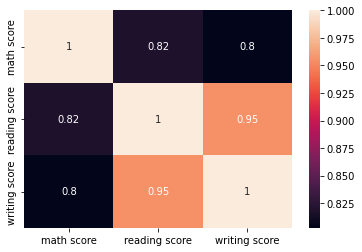

In [34]:
# correlation heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
# reading and writing scores are highly correlated (0.95)
# reading and math (0.82)
# writing and math (0.80) 